## 선형 판별분석과 이차 판별분석

### 판별분석

질적 척도로 이루어진 종속변수를 분류할 때 사용
- 최소제곱법을 사용하는 추정방법을 통해 독립변수의 최적 가중치를 구함
- 독립변수들이 정규분포를 이루지 않더라도 사용가능
- 로지스틱보다 더 적은 데이터로도 높은 성능을 뽑을 수 있음

종속변수의 범주가 2개일 경우
- 일반 판별 분석, 두 집단 판별 분석

종속변수의 범주가 3개 이상일 경우
- 다중 판별분석



## 선형 판별분석

분류 모델과 차원 축소에 사용

- PCA와의 차이점: 종속변수를 사용하는 지도학습으로 차원을 축소
- 종속변수의 범주 간 분별 정보를 최대한 유지시키면서 차원을 축소시키는 방식으로 데이터의 오분류율이 최소가 되는 축을 찾음

### 선형 판별함수
전체 범주의 분류 오차를 최소화하는 선형 판별함수를 도출한 다음 모든 관측치의 분류 점수를 도출함   
분류점수를 통해 해당 관측칙 어느 범주에 속할 것인지 예측할 수 있음
- 집단 내 분산에 비해 집단 간 분산의 차이를 극대화하는 독립변수의 함수를 찾음

선형 판별 분석의 순서   

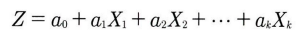

1. 판별상수를 더해준다
2. 독렵변수의 값에 판별계수를 곱한 값을 모두 더해준다
3. 각 범주에 대한 선형 판별함수를 도출한다
4. 관측치에 대하여 각 범주별 분류점수를 계산한다
5. 가장 큰 분류점수를 갖는 범주로 관측치를 분류해준다


선형판별 분석의 전제 조건

1. 데이터가 정규 분포한다
2. 각각의 범주들은 동일한 공분산 행렬을 갖는다
3. 독립변수들은 통계적으로 상호 독립적이다
- 3번이 성립하지 않을 경우 이차 판별분석을 사용한다     

>1,3번 직선 보다 2번 직선이 데이터를 가장 잘 분류해준다     

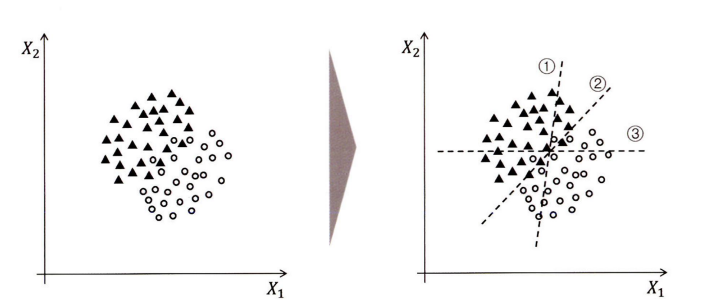


> 최적의 각도를 찾는 원리       

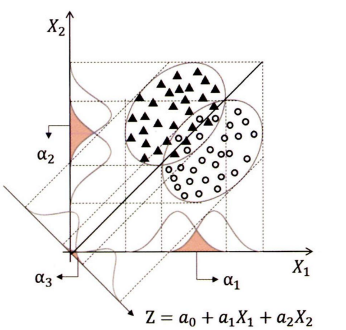

X_1만으로 두 집단을 분류할 경우, 오분류의 크기는 $\alpha_1$이고, X_2만으로 두 집단을 분류할 경우 오분류의 크기는 $\alpha_2이다. X_1,X_2를 모두 사용하면 각 변수에 각도를 조정할 수 있는 계숫값을 조정해주면서 최적의 일차방정식을 도출한다.     
오분류의 크기 $\alpha$가 최소화되는 직선의 함수식이 완성되면, 각 관측치의 변숫값을 대입하여 분류점수를 구할 수 있다     
위 그림에서는 $\alpha_3$이 가장 작은 오분류가 된다      
변수가 늘어가도 선형판별 함수 도출 과정은 동일하다

판별분석도 독립변수들 간 조합을 통해 최적의 분류식을 만드는 방식이기 때문에 전진선택법, 후진제거법, 단계적 선택법 등의 변수선택방법을 사용하여 모델의 성능을 향상시키는 것이 좋다

>판별분석의 분류점수를 계산하는 방법        

연령과 연 수익에 따른 자동차보유 여부를 예측하는 모델을 만들었을 때, 아래와 같은 결과값이 나왔다고 하자

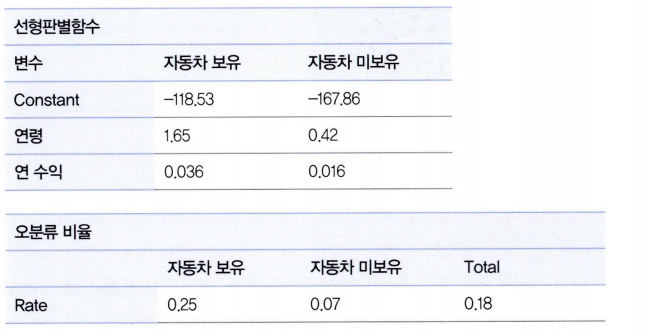

Constant는 선형 판별함수의 상수를 의미하며, 각 변수에 표기된 값은 계수를 의미한다   
따라서 A라는 사람이 30세에 연 수익이 3000만원이라면, 자동차 보유 범주에 대한 분류 점수는 $-118.53+1.65*30+0.036*3=38.97$이다. 동일한 방식으로 자동차 미보유에 대해 분류 점수를 계산하면 5.34가 나온다. 자동차 보유 점수가 더 높기 때문에 A는 자동차 보유 범주로 분류된다
    




## 이차 판별 분석

선형 판별 분석이 공분산 고자가 많이 다른 범주의 데이터를 잘 분류하지 못한다는 단점을 보완한 방법

장점: 비선형 분류가 가능
단점: 독립변수가 많을 경우 추정해야 하는 모수가 많아져서 선형 판별분석에 비해 연산량이 큼

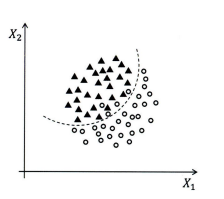

사진처럼 변수에 제곱을 취한 추가적인 변수들을 사용해서 결정경계선을 곡선의 형태로 만들어준다



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("bodyPerformance.csv")
df. head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


C:\Users\pjung\AppData\Local\Temp\ipykernel_11304\1853495172.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap="Blues", shade=False, cbar=False, ax=ax)
C:\Users\pjung\AppData\Local\Temp\ipykernel_11304\1853495172.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=df_woman.height_cm, y=df_woman.weight_kg, cmap="Reds", shade=False, ax=ax)


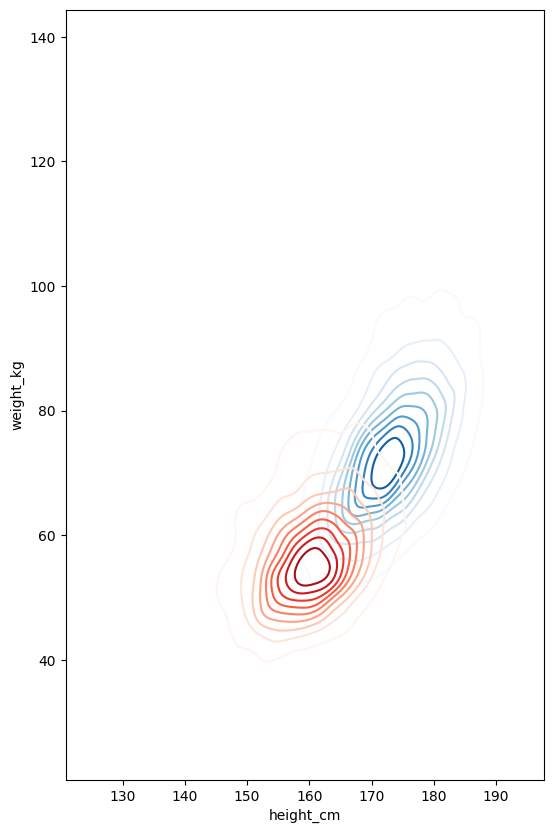

In [ ]:
# 성별 분포 시각화 (키X몸무게)

# 성별 구분 데이터셋 생성
# .loc: 특정 column 선택
df_man = df.loc[df['gender'] == 'M']
df_woman = df.loc[df['gender'] == 'F']

# 그래프 설정
f, ax = plt.subplots(figsize=(10, 10))
# x축, y축 1:1 비율로 설정
ax.set_aspect("equal")

# 가로길이, 세로길이 변수 축 설정
# kdeplot은 명시적으로 x,y 지정해주기
ax = sns.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap="Blues", shade='fill', cbar=False, ax=ax)
ax = sns.kdeplot(x=df_woman.height_cm, y=df_woman.weight_kg, cmap="Reds", shade=False, ax=ax)

plt.show()

In [8]:
# 독립변수 정규화

# 독립변수, 종속변수 분리
df_x = df.drop(['gender','age','class'],axis=1)
df_y = df[['gender']]

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

# 컬럼명 결합
df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172
1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776
2,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360
3,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772
4,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172


In [9]:
# 학습셋과 테스트셋 분리하여 생성(7:3)
x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.3,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  9375
test data 개수:  4018


In [10]:
# 선형 판별분석 모델 적용

LDA_1=LinearDiscriminantAnalysis(store_covariance=True)

LDA_1.fit(x_train, y_train) # LDA 적합
y_train_pred=LDA_1.predict(x_train)
y_test_pred=LDA_1.predict(x_test)

print(accuracy_score(y_train, y_train_pred)) # 학습셋 accuracy
print(accuracy_score(y_test, y_test_pred)) # 테스트셋 accuracy

0.9784533333333333
0.9810851169736187


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# 선형 판별분석 모델 상수와 계수 값 출력

print('Intercept: ', LDA_1.intercept_)
print('Coefficient: ', LDA_1.coef_)

Intercept:  [-14.29894437]
Coefficient:  [[ -1.35700815  26.12716198 -29.708912     4.0661269   10.03194981
   18.0750803  -57.34544185  -3.81399695  15.48677609]]


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pjung\AppData\Local\Temp\ipykernel_26196\3780834705.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'],
C:\Users\pjung\AppData\Local\Temp\ipykernel_26196\3780834705.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
s

<Axes: xlabel='lda_component'>

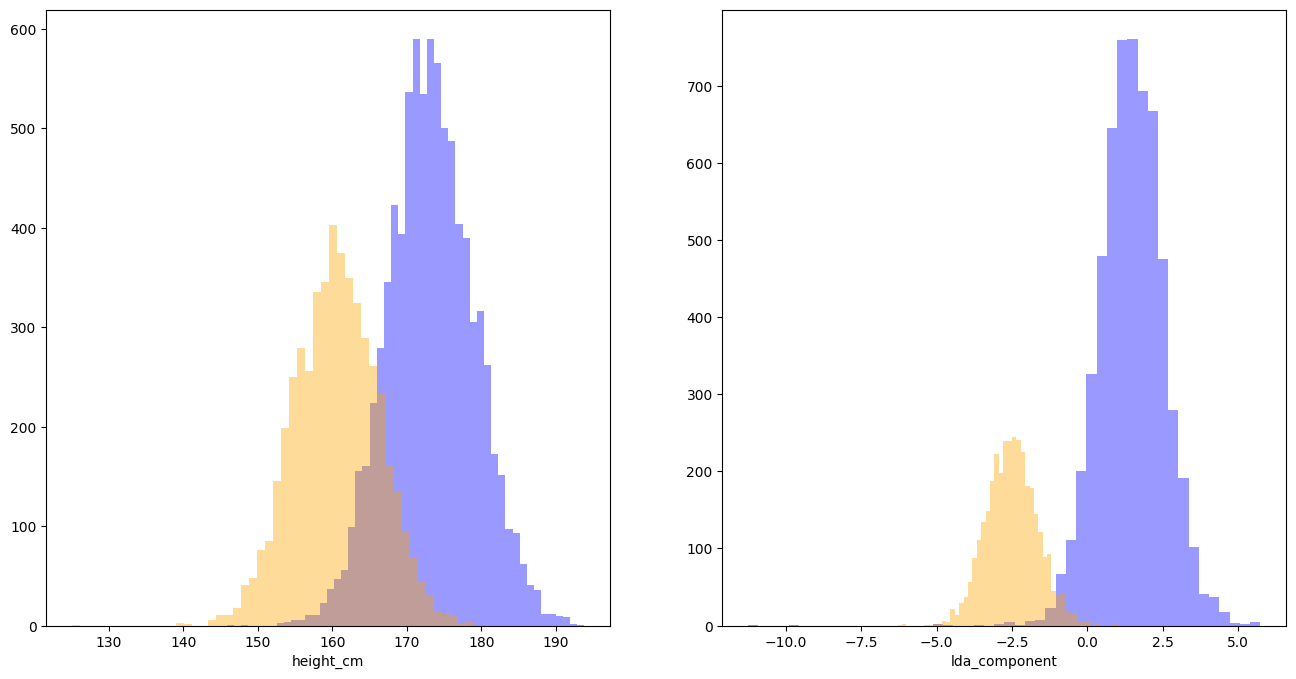

In [12]:
# 선형 판별분석 차원축소 적용

# 주성분 한개로 설정
lda_com = LinearDiscriminantAnalysis(n_components=1)
lda_com.fit(x_train, y_train)
df_lda_com = lda_com.transform(x_train)
df_lda_component = pd.DataFrame(df_lda_com,columns=['lda_component'])

# 종속변수 데이터셋 인덱스 초기화 및 결합
y_train_index = y_train.reset_index()
df_lda_component['target'] = y_train_index['gender']

# 차원축소 요소 분별력 비교 시각화 설정
fig, axs = plt.subplots(figsize=(16,8) , ncols=2 , nrows=1)

# 키 요소의 분별력
sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'], 
             hist=True, kde=False, color="blue", 
             label = 'man', ax=axs[0])
sns.distplot(df.loc[df['gender'] == 'F', 'height_cm'], 
             hist=True, kde=False, color="orange", 
             label = 'woman', ax=axs[0])

# 차원축소 주성분의 분별력
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'M', 'lda_component'], 
             hist=True, kde=False, color="blue", label = 'man', ax=axs[1])
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'F', 'lda_component'], 
             hist=True, kde=False, color="orange", label = 'woman', ax=axs[1])

In [13]:
# 이차 판별분석 모델 적용

qda=QuadraticDiscriminantAnalysis(store_covariance=True)

qda.fit(x_train, y_train) # QDA 적합
qda_y_train_pred=qda.predict(x_train)
qda_y_test_pred=qda.predict(x_test)


print(accuracy_score(y_train, qda_y_train_pred)) # 학습셋 accuracy
print(accuracy_score(y_test, qda_y_test_pred)) # 예측셋 accuracy

0.98048
0.9798407167745147


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# 이차 판별분석 모델 성능 리포트 출력

print(classification_report(y_test, qda_y_test_pred))

              precision    recall  f1-score   support

           F       0.97      0.97      0.97      1463
           M       0.98      0.98      0.98      2555

    accuracy                           0.98      4018
   macro avg       0.98      0.98      0.98      4018
weighted avg       0.98      0.98      0.98      4018



In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.svm import SVC
import pandas as pd

In [16]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [17]:
# 독립변수 정규화

# 독립변수, 종속변수 분리
df_x = df.drop(['Area','Class'],axis=1)
df_y = df[['Class']]

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

# 컬럼명 결합
df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493


In [18]:
# 학습셋과 테스트셋 분리하여 생성(6:4)

x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.4,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


In [19]:
# 선형 SVM 모델 성능 확인

#3차항(degree), 학습 반복횟수(max_iter) 10000 설정
svm_model = SVC(kernel = 'linear', degree = 3, gamma = 'auto', C=10, max_iter = 1000)

svm_model.fit(x_train,y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_test, y_test))

0.8648148148148148
0.8638888888888889


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# SVM C값 1~30에 따른 모델 성능 확인

scores = []
for C_point in [*range(1,31)]:
    svc=SVC(kernel='rbf',C=C_point,max_iter = 1000)
    C_model=svc.fit(x_train, y_train)
    train_score = C_model.score(x_train, y_train)
    test_score = C_model.score(x_test, y_test)
    print("rbf SVM : C:{}, train set score:{:2f}, test set score:{:2f}".format
          (C_point,train_score, test_score))
    scores.append([train_score, test_score])

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

rbf SVM : C:1, train set score:0.857407, test set score:0.883333
rbf SVM : C:2, train set score:0.864815, test set score:0.880556
rbf SVM : C:3, train set score:0.862963, test set score:0.886111
rbf SVM : C:4, train set score:0.861111, test set score:0.880556
rbf SVM : C:5, train set score:0.861111, test set score:0.880556
rbf SVM : C:6, train set score:0.862963, test set score:0.883333
rbf SVM : C:7, train set score:0.866667, test set score:0.883333
rbf SVM : C:8, train set score:0.864815, test set score:0.883333
rbf SVM : C:9, train set score:0.864815, test set score:0.883333
rbf SVM : C:10, train set score:0.864815, test set score:0.891667
rbf SVM : C:11, train set score:0.864815, test set score:0.891667
rbf SVM : C:12, train set score:0.862963, test set score:0.891667
rbf SVM : C:13, train set score:0.864815, test set score:0.891667
rbf SVM : C:14, train set score:0.864815, test set score:0.891667
rbf SVM : C:15, train set score:0.864815, test set score:0.897222
rbf SVM : C:16, tra

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

rbf SVM : C:18, train set score:0.864815, test set score:0.891667
rbf SVM : C:19, train set score:0.864815, test set score:0.891667
rbf SVM : C:20, train set score:0.864815, test set score:0.891667
rbf SVM : C:21, train set score:0.864815, test set score:0.888889
rbf SVM : C:22, train set score:0.864815, test set score:0.883333
rbf SVM : C:23, train set score:0.864815, test set score:0.883333
rbf SVM : C:24, train set score:0.862963, test set score:0.886111
rbf SVM : C:25, train set score:0.861111, test set score:0.886111
rbf SVM : C:26, train set score:0.861111, test set score:0.888889


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversio

rbf SVM : C:27, train set score:0.862963, test set score:0.888889
rbf SVM : C:28, train set score:0.861111, test set score:0.886111
rbf SVM : C:29, train set score:0.861111, test set score:0.886111
rbf SVM : C:30, train set score:0.861111, test set score:0.886111


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversio

In [21]:
# SVM gamma값 1~30에 따른 모델 성능 확인

scores = []
for gamma_point in [0.1,0.5,1,5,10,20]:
    svc=SVC(kernel='rbf',C=10,gamma=gamma_point,max_iter = 1000)
    model=svc.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print("rbf SVM : gamma:{}, train set score:{:2f}, test set score:{:2f}".format
          (gamma_point,train_score, test_score))
    scores.append([train_score, test_score])

rbf SVM : gamma:0.1, train set score:0.862963, test set score:0.866667
rbf SVM : gamma:0.5, train set score:0.864815, test set score:0.880556
rbf SVM : gamma:1, train set score:0.861111, test set score:0.877778
rbf SVM : gamma:5, train set score:0.862963, test set score:0.880556
rbf SVM : gamma:10, train set score:0.864815, test set score:0.883333
rbf SVM : gamma:20, train set score:0.879630, test set score:0.872222


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'pmdarima'

In [25]:
df = pd.read_csv("walmart_cleaned.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'walmart_cleaned.csv'

In [27]:
# 전체 매출 추세 확인

plt.figure(figsize=(22,8))
plt.plot(df_agg.Date2,df_agg.Weekly_Sales)
plt.title("Walmart Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

NameError: name 'df_agg' is not defined

<Figure size 2200x800 with 0 Axes>

In [ ]:
# 시계열 분해용 데이터셋 생성

timeSeries_decomp = df_agg.loc[:, ["Date2","Weekly_Sales"]]
timeSeries_decomp.index = timeSeries_decomp.Date2
ts_decomp = timeSeries_decomp.drop("Date2",axis=1)

ts_decomp.head()

In [ ]:
# 시계열 분해 시각화

# period= 월 별은 12, 주 별은 4, 일 별은 7
decomp = seasonal_decompose(ts_decomp['Weekly_Sales'], model='additive', period=4)

fig = plt.figure()  
fig = decomp.plot()  
fig.set_size_inches(20, 15)
plt.show()

In [ ]:
# ACF, PACF 그래프 시각화

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts_decomp, lags=60, ax=ax1)

ax2 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(ts_decomp, lags=60, ax=ax2)

In [ ]:
# 회귀모델 용 데이터셋 가공

# 1~4, 52주 전 시점 패생변수 생성
df_agg['Weekly_Sales_1w'] = df_agg['Weekly_Sales'].shift(1)
df_agg['Weekly_Sales_2w'] = df_agg['Weekly_Sales'].shift(2)
df_agg['Weekly_Sales_3w'] = df_agg['Weekly_Sales'].shift(3)
df_agg['Weekly_Sales_4w'] = df_agg['Weekly_Sales'].shift(4)
df_agg['Weekly_Sales_52w'] = df_agg['Weekly_Sales'].shift(52)

# 모델용 데이터셋 기간 설정
df_agg_set = df_agg[df_agg["Date2"].isin(pd.date_range('2011-02-05', '2012-10-26'))]

# 독립변수, 종속변수 분리
df_x = df_agg_set.drop(['Year','Date2','Weekly_Sales'],axis=1)
df_y = df_agg_set[['Weekly_Sales']]


# 학습셋과 테스트셋 분리하여 생성(6:4)

x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.4,random_state=1)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

In [ ]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train) 

# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

# 모델 성능 확인
print("학습셋 R-Square: {:.5f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.5f}".format(mreg.score(x_test, y_test)))

In [ ]:
# 모델 상세 확인

ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

In [ ]:
# ADF 검정

# p-value가 0.05 미만이므로 대립가설채택. 즉, 정상성 만족.
def ADF(ts_decomp): 
    result = adfuller(ts_decomp.values, autolag="AIC") 
    print("------ Augmented Dickey-Fuller Test ------")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %1.10f' % result[1])
    print('Lag: %d' % result[2])
    print('observation: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
 
ADF(ts_decomp)

In [ ]:
# ARIMA용 학습셋, 테스트셋 생성

train= ts_decomp.loc['2010-02-05':'2012-09-21']
test= ts_decomp.loc['2012-09-28':'2012-10-26']

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(train))
print('test data 개수: ', len(test))

In [ ]:
# ARIMA 예측값 출력

# p,d,q 파라미터값 설정
p, d, q = 3, 0, 3

model_arima = ARIMA(train["Weekly_Sales"], order=(p,d,q)) 
model_arima_fit = model_arima.fit()

# 예측값 출력
pred1 = model_arima_fit.forecast(steps=5)[0]
pred1 = pd.Series(pred1, index=test.index)

print(np.round_(pred1,2))

In [ ]:
# ARIMA 모델 예측값 시각화

fig, ax = plt.subplots(figsize=(15,5))
graph = sns.lineplot(x='Date2', y='Weekly_Sales', data = train)
pred1.plot(ax=ax, color='red', marker="o", legend=True)
test.plot(ax=ax, color='blue', marker="o", legend=True)

In [ ]:
# Auto-ARIMA 모델 예측값 시각화

auto_arima_model = pm.auto_arima(train, seasonal=True, m=52)

# 모델 예측
pred2 = auto_arima_model.predict(5) 
pred2 = pd.Series(pred2, index=test.index)
pred2 = pred2.rename("Auto Arima")

# 예측값 시각화
fig, ax = plt.subplots(figsize=(15,5))
graph = sns.lineplot(x='Date2', y='Weekly_Sales', data = train)
pred2.plot(ax=ax, color='red', marker="o", legend=True)
test.plot(ax=ax, color='blue', marker="o", legend=True)


In [ ]:
# Auto-ARIMA 모델 요약

print(auto_arima_model.summary())

In [ ]:
# 모델 적합성 시각화

auto_arima_model.plot_diagnostics(figsize=(15,5))